<a href="https://colab.research.google.com/github/Osw1997/An-Introduction-to-Statistical-Learning/blob/main/Scripts/Resampling%20methods/applied_exercises_ch5_resampling_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5 - Resampling methods

In [2]:
!pip install --upgrade scipy
!pip install --upgrade plotly

     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 28.8 MB 33.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


# Applied exercises
---
---
---
## Exercise 5.
In Chapter 4, we used logistic regression to predict the probability of
default using income and balance on the Default data set. We will
now estimate the test error of this logistic regression model using the
validation set approach. Do not forget to set a random seed before
beginning your analysis.


In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t

In [4]:
import scipy
scipy.__version__

'1.7.3'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
default = pd.read_csv('drive/MyDrive/itsl_datasets/Default.csv')
default.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [7]:
default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [8]:
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [9]:
# One Hot Encoding
default_ohe = default.copy()
default_ohe['default'] = pd.get_dummies(default_ohe['default']).drop('No', axis=1)
default_ohe['student'] = pd.get_dummies(default_ohe['student']).drop('No', axis=1)
default_ohe.describe()

,default,student,balance,income
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.033300,0.294400,835.374886,33516.981876
std,0.179428,0.455795,483.714985,13336.639563
min,0.000000,0.000000,0.000000,771.967729
25%,0.000000,0.000000,481.731105,21340.462903
50%,0.000000,0.000000,823.636973,34552.644802
75%,0.000000,1.000000,1166.308386,43807.729272
max,1.000000,1.000000,2654.322576,73554.233495


In [10]:
default_ohe.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# (a) Fit a logistic regression model that uses income and balance to predict default.
print("=" * 50)
print("Logistic Regression for 'default' ~ 'income' + 'balance'")
SEED = 9
lr = LogisticRegression(random_state=SEED)
lr.fit(X=default_ohe[['income', 'balance']],
       y=default_ohe['default'])
print("Score for only one block: ", end=' ')
print(lr.score(X=default_ohe[['income', 'balance']],
       y=default_ohe['default']))


# (b) Using the validation set approach, estimate the test error of this
# model. In order to do this, you must perform the following steps:
# * i. Split the sample set into a training set and a validation set.
# * ii. Fit a multiple logistic regression model using only the training observations.
# * iii. Obtain a prediction of default status for each individual in
# the validation set by computing the posterior probability of
# default for that individual, and classifying the individual to
# the default category if the posterior probability is greater
# than 0.5.
# * iv. Compute the validation set error, which is the fraction of
# the observations in the validation set that are misclassified.
folds = 5
scores = cross_val_score(estimator=lr, 
                         X=default_ohe[['income', 'balance']],
                         y=default_ohe['default'],
                         cv=folds)
print(f"Scores for {folds}-Fold: ", end=' ')
print(scores)


# (c) Repeat the process in (b) three times, using three different splits
# of the observations into a training set and a validation set. Comment on the results obtained.
folds = 3
scores = cross_val_score(estimator=lr, 
                         X=default_ohe[['income', 'balance']],
                         y=default_ohe['default'],
                         cv=folds)
print(f"Scores for {folds}-Fold: ", end=' ')
print(scores)
print(f"mean scores: {sum(scores) / len(scores)}")


# (d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable
# for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a
# dummy variable for student leads to a reduction in the test error
# rate.
print()
print("=" * 50)
print("Logistic Regression for 'default' ~ 'income' + 'balance' + 'student' [DUMMY]")
folds = 5
scores = cross_val_score(estimator=lr, 
                         X=default_ohe[['income', 'balance', 'student']],
                         y=default_ohe['default'],
                         cv=folds)
print(f"Scores for {folds}-Fold: ", end=' ')
print(scores)
print(f"mean scores: {sum(scores) / len(scores)}")

# print("\n")
# print("=" * 50)
# print("Logistic Regression for 'default' ~ 'income' + 'balance' + 'student' [NOT DUMMY]")
# folds = 5
# scores = cross_val_score(estimator=lr, 
#                          X=default[['income', 'balance', 'student']],
#                          y=default['default'],
#                          cv=folds)
# print(f"Scores for {folds}-Fold: ", end=' ')
# print(scores)

Logistic Regression for 'default' ~ 'income' + 'balance'
Score for only one block:  0.9737
Scores for 5-Fold:  [0.9745 0.9735 0.9665 0.9655 0.975 ]
Scores for 3-Fold:  [0.97360528 0.97149715 0.96579658]
mean scores: 0.9702996694390494

Logistic Regression for 'default' ~ 'income' + 'balance' + 'student' [DUMMY]
Scores for 5-Fold:  [0.975  0.9685 0.9685 0.9675 0.9645]
mean scores: 0.9688000000000001


---
---
---
## Ejercicio 6
We continue to consider the use of a logistic regression model to
predict the probability of default using income and balance on the
Default data set. In particular, we will now compute estimates for
the standard errors of the income and balance logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using
the standard formula for computing the standard errors in the glm()
function. Do not forget to set a random seed before beginning your
analysis.



In [12]:
# (a) Using the summary() and glm() functions, determine the estimated standard
#  errors for the coefficients associated with income and balance in a multiple 
#  logistic regression model that uses both predictors.
from sklearn.linear_model import TweedieRegressor
print("Let's compare standard errors: ")
print(default_ohe[['income', 'balance']].describe())            # basic SE

glm = TweedieRegressor(power=0)
glm.fit(X=default_ohe[['income', 'balance']], y=default_ohe['default'])
glm.get_params()


print()
import statsmodels.api as sm
model = sm.formula.glm("default ~ income + balance - 1",
                       family=sm.families.Binomial(), data=default_ohe).fit()
print(model.summary())




Let's compare standard errors: 
             income       balance
count  10000.000000  10000.000000
mean   33516.981876    835.374886
std    13336.639563    483.714985
min      771.967729      0.000000
25%    21340.462903    481.731105
50%    34552.644802    823.636973
75%    43807.729272   1166.308386
max    73554.233495   2654.322576



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1734.6
Date:                Sun, 10 Apr 2022   Deviance:                       3469.1
Time:                        00:26:22   Pearson chi2:                 3.87e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
income        -0.0001    3.7e-06    -34.025      0.0

In [13]:
# (b) Write a function, boot.fn(), that takes as input the Default data
# set as well as an index of the observations, and that outputs
# the coefficient estimates for income and balance in the multiple
# logistic regression model.
from scipy.stats import bootstrap
import numpy as np
# res = bootstrap((np.array(default_ohe[['income', 'balance']]),), np.std,
#                 confidence_level=0.95, random_state=SEED)
res_mlr = bootstrap((np.array(lr.predict(X=default_ohe[['income', 'balance']])),), np.std,
                confidence_level=0.95, random_state=SEED)
res_mlr.confidence_interval


# (c) Use the boot() function together with your boot.fn() function to
# estimate the standard errors of the logistic regression coefficients
# for income and balance.
res_predictors = bootstrap((np.array(default_ohe[['income', 'balance']]),), np.std,
                confidence_level=0.95, random_state=SEED, n_resamples=2500)
print("Standard errors for predictors: ", end=' ')
print(res_predictors.standard_error)


# (d) Comment on the estimated standard errors obtained using the
# glm() function and using your bootstrap function.
res_glm = bootstrap((np.array(model.predict()),), np.std,
                confidence_level=0.95, random_state=SEED, n_resamples=2500)
print("Standard errors for GLM output: ", end=' ')
print(res_glm.standard_error)

Standard errors for predictors:  [68.0697185   3.13708541]
Standard errors for GLM output:  0.0009011944428032815


---
---
---
# Exercise 7
In Sections 5.3.2 and 5.3.3, we saw that the cv.glm() function can be
used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just the glm() and
predict.glm() functions, and a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic
regression model on the Weekly data set. Recall that in the context
of classification problems, the LOOCV error is given in (5.4).


In [14]:
# Transforming the Weekly dataset
weekly = pd.read_csv('drive/MyDrive/itsl_datasets/Weekly.csv')
weekly_ohe = weekly.copy()
weekly_ohe['Direction'] = pd.get_dummies(weekly_ohe['Direction']).drop('Down', axis=1)

In [15]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
# (a) Fit a logistic regression model that predicts Direction using Lag1 and Lag2.
log_reg = LogisticRegression()
log_reg.fit(X=weekly_ohe[['Lag1', 'Lag2']], y=weekly_ohe['Direction'])



# (b) Fit a logistic regression model that predicts Direction using Lag1
# and Lag2 using all but the first observation.
# loocv = LeaveOneOut()
# print(loocv.get_n_splits(np.array(weekly_ohe[['Lag1', 'Lag2']])))
# scores = list()
X = np.array(weekly_ohe[['Lag1', 'Lag2']])[1:]
y = np.array(weekly_ohe[['Direction']])[1:]

# print(np.mean(scores))
log_reg_no_first_obs = LogisticRegression()
log_reg_no_first_obs.fit(X=X, y=y)



# (c) Use the model from (b) to predict the direction of the first observation.
# You can do this by predicting that the first observation will go up
#  if P(Direction = "Up"|Lag1, Lag2) > 0.5.
# Was this observation correctly classified?
prob_up = log_reg.predict_proba(X=np.array(weekly_ohe[['Lag1', 'Lag2']])[:1])
classf = 1 if prob_up[0][0] > 0.5 else 0
print("=" * 50)
print(f"Results --> real: {weekly_ohe['Direction'][0]}  Vs  predicted: {classf}")
print("=" * 50)



# (d) Write a for loop from i = 1 to i = n, where n is the number of
# observations in the data set, that performs each of the following
# steps:
results_list = []
for i in range(len(weekly_ohe['Direction'])):
    # i. Fit a logistic regression model using all but the ith observation to predict Direction using Lag1 and Lag2.
    valid_rows = ~weekly_ohe.index.isin([i])
    data_x, data_y = weekly_ohe[valid_rows][['Lag1', 'Lag2']], weekly_ohe[valid_rows]['Direction']
    dynamic_log_reg = LogisticRegression()
    dynamic_log_reg.fit(X=data_x, y=data_y)
    # ii. Compute the posterior probability of the market moving up
    # for the ith observation.
    proba = dynamic_log_reg.predict_proba(X=weekly_ohe[~valid_rows][['Lag1', 'Lag2']])
    # iii. Use the posterior probability for the ith observation in order
    # to predict whether or not the market moves up.
    prediction = 1 if proba[0][0] > 0.5 else 0
    # iv. Determine whether or not an error was made in predicting
    # the direction for the ith observation. If an error was made,
    # then indicate this as a 1, and otherwise indicate it as a 0.
    real_direction = weekly_ohe[~valid_rows]['Direction'].values[0]
    # print(f"Real direcion: {real_direction}")
    # print(f"Prediction: {prediction}")
    results_list.append(1 if prediction != real_direction else 0)

# (e) Take the average of the n numbers obtained in (d)iv in order to
# obtain the LOOCV estimate for the test error. Comment on the
# results.
print(f"LOOCV :: Mean {np.mean(results_list)}")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


Results --> real: 0  Vs  predicted: 0
LOOCV :: Mean 0.5500459136822773


---
---
---
#Exercise 8.
We will now perform cross-validation on a simulated data set.
(a) Generate a simulated data set as follows:
#### set.seed (1)
#### x <- rnorm (100)
#### y <- x - 2 * x^2 + rnorm (100)

In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

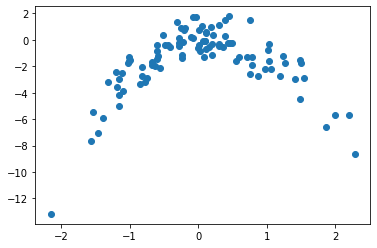


This is for X^1
Coefs: 
[0.         0.35360732]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.757
Date:                Sun, 10 Apr 2022   Prob (F-statistic):              0.188
Time:                        04:13:40   Log-Likelihood:                -228.38
No. Observations:                 100   AIC:                             460.8
Df Residuals:                      98   BIC:                             466.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Int

In [124]:
# Creation of dataset
X = np.random.normal(size=100)
y = X - 2 * X ** 2 + np.random.normal(size=100)
# y += np.abs(np.min(y))
# y = y / np.max(np.abs(y))

df_ex8 = pd.DataFrame({'X': X, 'y': y})

# (b) Create a scatterplot of X against Y . Comment on what you find.
import matplotlib.pyplot as plt
plt.scatter(df_ex8['X'], df_ex8['y'])
plt.show()

# (c) Set a random seed, and then compute the LOOCV errors that
# result from fitting the following four models using least squares:
# 5.4 Exercises 223
# i. Y = β0 + β1X + ϵ
# ii. Y = β0 + β1X + β2X**2 + ϵ
# iii. Y = β0 + β1X + β2X**2 + β3X**3 + ϵ
# iv. Y = β0 + β1X + β2X**2 + β3X**3 + β4X**4 + ϵ.
# Note you may find it helpful to use the data.frame() function
# to create a single data set containing both X and Y .
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import numpy as np
 
class statsmodel(BaseEstimator, RegressorMixin):
    def __init__(self, sm_class, formula):
        self.sm_class = sm_class
        self.formula = formula
        self.model = None
        self.result = None
 
    def fit(self,data,dummy):
        self.model = self.sm_class(self.formula,data)
        self.result = self.model.fit()
    
    def summary(self):
        return self.result.summary()
 
    def predict(self,X):
        return self.result.predict(X)

loocv = LeaveOneOut()
# model = LogisticRegression(random_state=SEED) # CORRECT THIS
equations = ['y ~ X',
             'y ~ X + np.power(X, 2)', 
             'y ~ X + np.power(X, 2) + np.power(X, 3)', 
             'y ~ X + np.power(X, 2) + np.power(X, 3) + np.power(X, 4)']

# for f in equations:
#     print()
#     print("=" * 100)
#     print(f"This is for {f}")
#     # log_reg = smf.ols(formula=f, data=df_ex8).fit()
#     clf = statsmodel(smf.ols, f)
#     scores = cross_val_score(clf, X=df_ex8, y=df_ex8['y'], scoring='neg_mean_squared_error', n_jobs=-1)
#     print("Summary: ")
#     clf.fit(data=df_ex8, dummy=df_ex8['y'])
#     print(clf.summary())
#     print('Accuracy: %.3f --- STD: (%.3f)' % (np.mean(scores), np.std(scores)))

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

for i in range(1,5):
    print()
    print("=" * 200)
    print(f"This is for X^{i}")
    poly = PolynomialFeatures(degree=i)
    X_ = poly.fit_transform(X.reshape(-1,1))
    clf = linear_model.LinearRegression()
    scores = cross_val_score(clf, X=X_, y=y, scoring='neg_mean_squared_error', n_jobs=-1, )
    print("Coefs: ")
    clf = linear_model.LinearRegression().fit(X=X_, y=y)
    print(clf.coef_)
    # for getting the significance (p-value)
    print(smf.ols(formula=equations[i - 1], data=df_ex8).fit().summary())
    print('\n>>> Errors :: mean: %.3f --- STD: (%.3f)' % (np.mean(scores), np.std(scores)))



# (d) Repeat (c) using another random seed, and report your results.
# Are your results the same as what you got in (c)? Why?
# A = Same. You are just sorting in a different way your data.


# (e) Which of the models in (c) had the smallest LOOCV error? Is
# this what you expected? Explain your answer.
# A = the second grade equation. It's better because the pattern that we can
#     see in the plot is quadratic (parable). Higher equations are not necessary.


# (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using
# least squares. Do these results agree with the conclusions drawn
# based on the cross-validation results?
# A = Yes. We can see that the 2nd grade equation performs better and this allows us to verify that 
#     even a "better"/complex model is not always better because it can overfit or it can have a high BIAS.




---
---
---
# Exercise 9
We will now consider the Boston housing data set, from the ISLR2
library.

In [127]:
btn = pd.read_csv('drive/MyDrive/itsl_datasets/Boston.csv')
btn.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'lstat', 'medv'],
      dtype='object')

In [128]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [129]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [ ]:
# (a) Based on this data set, provide an estimate for the population
# mean of medv. Call this estimate ˆµ.



# (b) Provide an estimate of the standard error of ˆµ. Interpret this
# result.
# Hint: We can compute the standard error of the sample mean by
# dividing the sample standard deviation by the square root of the
# number of observations.



# (c) Now estimate the standard error of ˆµ using the bootstrap. How
# does this compare to your answer from (b)?



# (d) Based on your bootstrap estimate from (c), provide a 95 % confidence interval for the mean of medv. Compare it to the results
# obtained using t.test(Boston$medv).
# Hint: You can approximate a 95 % confidence interval using the
# formula [ˆµ − 2SE(ˆµ), µˆ + 2SE(ˆµ)].



# (e) Based on this data set, provide an estimate, ˆµmed, for the median
# value of medv in the population.



# (f) We now would like to estimate the standard error of ˆµmed. Unfortunately, there is no simple formula for computing the standard
# error of the median. Instead, estimate the standard error of the
# median using the bootstrap. Comment on your findings.



# (g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts. Call this quantity ˆµ0.1.
# (You can use the quantile() function.)



# (h) Use the bootstrap to estimate the standard error of ˆµ0.1. Comment on your findings.

